In [26]:
#!pip install numpy-financial #Might have to install this
import numpy_financial as npf
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_csv("Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
lis = [92683, 92804, 92704, 92703, 92801, 90631, 92805, 92677,
       92630, 92627, 92707, 92647, 92530, 92780, 92708, 92646,
       92840, 92626, 92701, 92870, 92705, 92833, 92691, 92656,
       90630, 92886, 92843, 90620, 92648, 92688, 92620, 92692,
       92821, 92867, 92806, 92802, 92807, 92618, 92831, 92672,
       90621, 92841, 92869, 92675, 92649, 92660, 92694, 92706,
       92602, 92679, 92604, 92673, 92883, 92653, 92612, 92651,
       92629, 90680, 92868, 92782, 92835, 92614, 92832, 90740,
       92844, 92606, 90720, 92887, 92663, 92865, 92878, 92808,
       92845, 92866, 92637, 92617, 90623, 92603, 92657, 92625,
       92610, 92676, 92624, 92861, 92655, 92823, 92661, 92662,
       92697, 90742, 92834, 92725, 92822, 92825, 92837, 92836,
       92838, 92842, 92846, 92856, 92850, 92859, 92857, 92863,
       92862, 92864, 92871, 92885, 92899, 92605, 92609, 92607,
       92615, 92616, 92619, 92623, 92628, 92650, 92652, 92654,
       92659, 92658, 92674, 92678, 92684, 92685, 92690, 92693,
       92698, 92702, 92709, 92711, 92710, 92712, 92735, 92728,
       92781, 92799, 92803, 92811, 92809,  92814, 92812, 92816,
       92815, 92817, 90622, 90624, 90632, 90633, 90721, 90743]

df2 = df.RegionName.isin(lis)#Filter data to include only the zip codes in the list
df3 = df[df2].dropna()
df4 = df3.iloc[:, :9].copy()
df3 = df3.iloc[:, 246:].copy()#Filter to only include last three years
summary_ave_mortgage = df3.copy()
summary_ave_mortgage['average'] = summary_ave_mortgage.mean(numeric_only=True, axis=1)#add avg
mortgage = pd.concat([df4, summary_ave_mortgage], axis="columns")
mortgage.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2019-10-31,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,average
48,97023,48,92804,zip,CA,CA,Anaheim,"Los Angeles-Long Beach-Anaheim, CA",Orange County,602262.0,...,836997.0,855167.0,871090.0,884948.0,884383.0,876550.0,863098.0,855521.0,849074.0,724356.378378
54,97004,54,92704,zip,CA,CA,Santa Ana,"Los Angeles-Long Beach-Anaheim, CA",Orange County,576308.0,...,772363.0,790747.0,807691.0,822494.0,822347.0,814022.0,800409.0,793327.0,788530.0,677984.513514
148,97003,148,92703,zip,CA,CA,Santa Ana,"Los Angeles-Long Beach-Anaheim, CA",Orange County,544280.0,...,746606.0,763828.0,778505.0,790457.0,789341.0,779941.0,766031.0,758888.0,753321.0,648479.837838
199,97020,199,92801,zip,CA,CA,Anaheim,"Los Angeles-Long Beach-Anaheim, CA",Orange County,563717.0,...,795535.0,812647.0,827743.0,839440.0,837250.0,827890.0,813875.0,806565.0,800718.0,686181.513514
207,96186,207,90631,zip,CA,CA,La Habra,"Los Angeles-Long Beach-Anaheim, CA",Orange County,615467.0,...,842875.0,859787.0,874821.0,886961.0,885704.0,877738.0,863169.0,854258.0,846693.0,733929.108108


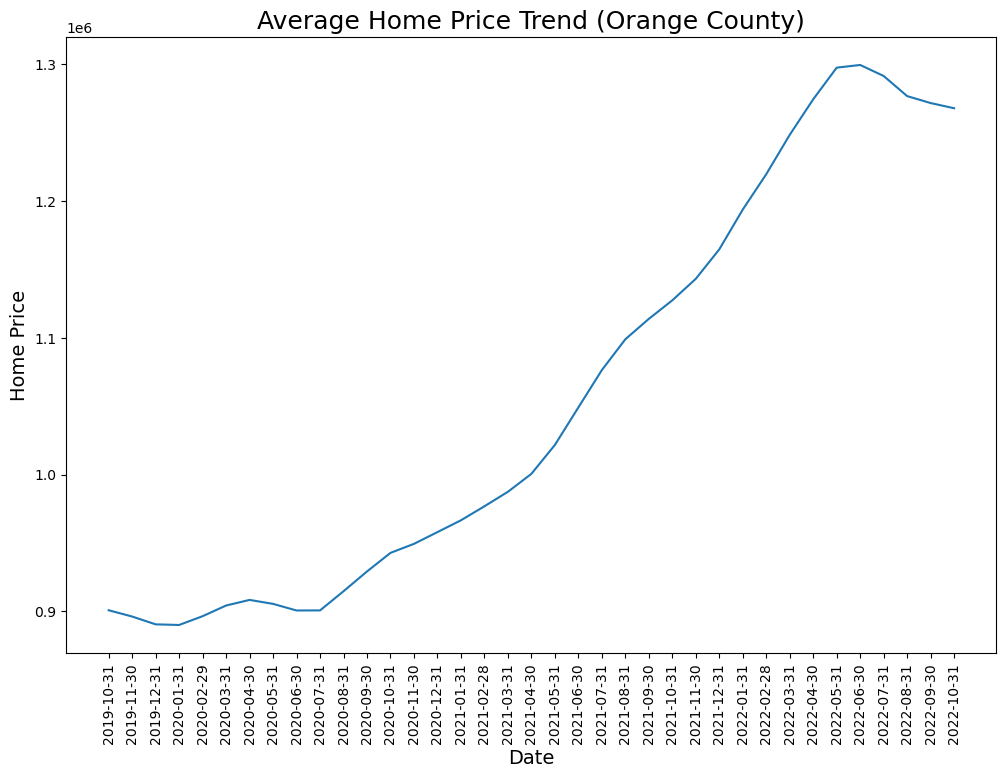

In [27]:
# Average home price three-year trend
X_lst = list(mortgage.columns.values[9:-1])
X_lst

m_oc_lst = []
for i in X_lst:
    m_oc_lst.append(mortgage[i].mean())

# print(Y_lst)

plt.figure(figsize=(12, 8))
plt.plot(X_lst, m_oc_lst)
plt.title('Average Home Price Trend (Orange County)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Home Price', fontsize=14)
plt.xticks(rotation=90)
plt.show()

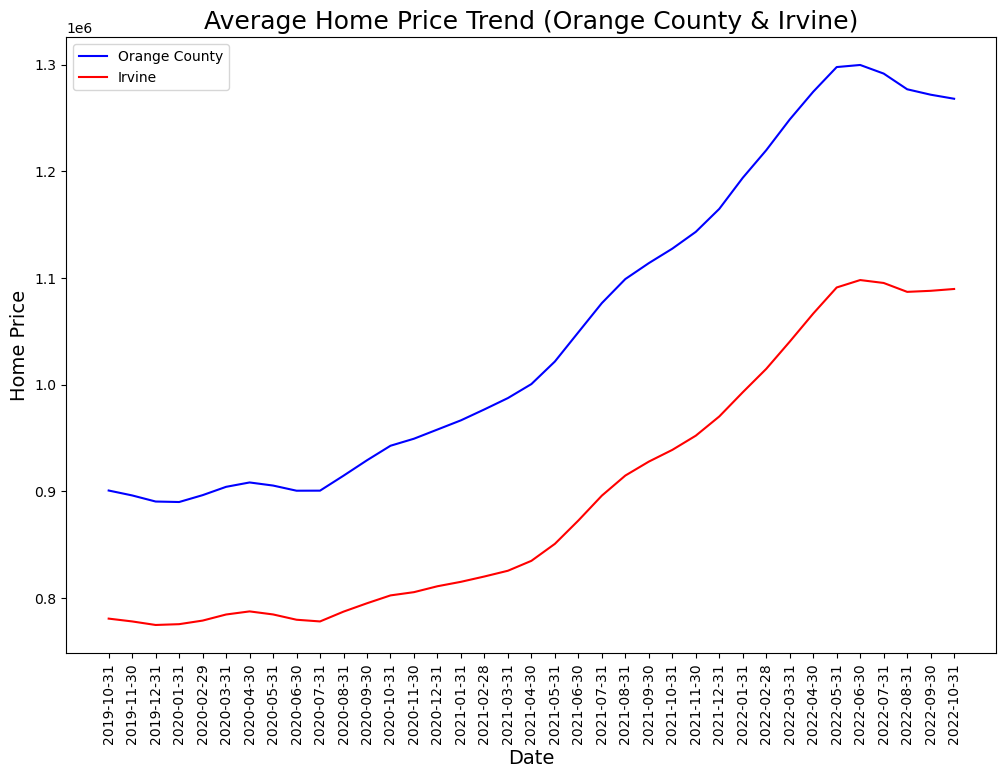

In [28]:
# Average mortgage three-year trend (OC + Irvine)

X_lst = list(mortgage.columns.values[9:-1])
X_lst

m_oc_lst = []
m_oc_i_lst = []
for i in X_lst:
    m_oc_lst.append(mortgage[i].mean())
    m_oc_i_lst.append(mortgage[mortgage['City'] == 'Irvine'][i].mean())


plt.figure(figsize=(12, 8))
plt.plot(X_lst, m_oc_lst, color = 'blue', label="Orange County")
plt.plot(X_lst, m_oc_i_lst, color = 'red', label="Irvine")
plt.legend()
plt.title('Average Home Price Trend (Orange County & Irvine)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Home Price', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [29]:
dfZip = pd.read_csv("Zip_zori_sm_month.csv")
dfZip2 = dfZip.RegionName.isin(lis)#Filter data to include only the zip codes in the list
dfZip3 = dfZip[dfZip2].dropna()
dfZip4 = dfZip3.copy().iloc[:, : 9]
dfZip3 = dfZip3.iloc[:, 64:].copy()#Filter to only include last three years
summary_ave_data = dfZip3.copy()
summary_ave_data['average'] = summary_ave_data.mean(numeric_only=True, axis=1)#Add avg
#print(summary_ave_data.iloc[:, -1].mean())
rental = pd.concat([dfZip4, summary_ave_data], axis="columns")
rental.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2019-10-31,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,average
256,96987,269,92677,zip,CA,CA,Laguna Niguel,"Los Angeles-Long Beach-Anaheim, CA",Orange County,2434.400061,...,3113.139400,3135.233509,3192.261278,3245.038115,3286.541535,3305.240156,3295.697150,3300.404236,3247.959392,2756.718228
338,96959,354,92627,zip,CA,CA,Costa Mesa,"Los Angeles-Long Beach-Anaheim, CA",Orange County,2355.024494,...,2945.327983,2967.038668,2972.350121,3030.842190,3066.854571,3090.240015,3104.133842,3142.037469,3128.835017,2655.007376
556,96964,579,92646,zip,CA,CA,Huntington Beach,"Los Angeles-Long Beach-Anaheim, CA",Orange County,2675.885062,...,3236.457159,3285.723580,3325.136229,3351.708057,3382.964527,3391.976107,3400.138781,3380.752603,3407.051515,2968.031035
791,97041,841,92833,zip,CA,CA,Fullerton,"Los Angeles-Long Beach-Anaheim, CA",Orange County,2404.969951,...,2938.692195,3046.295246,3116.611485,3166.336322,3146.268004,3089.458751,3036.513486,3008.684516,3035.100000,2706.515553
849,96974,905,92656,zip,CA,CA,Aliso Viejo,"Los Angeles-Long Beach-Anaheim, CA",Orange County,2425.415600,...,3032.445527,3084.486226,3100.365924,3121.372341,3151.828062,3223.094485,3236.054591,3209.952467,3157.612857,2693.260599


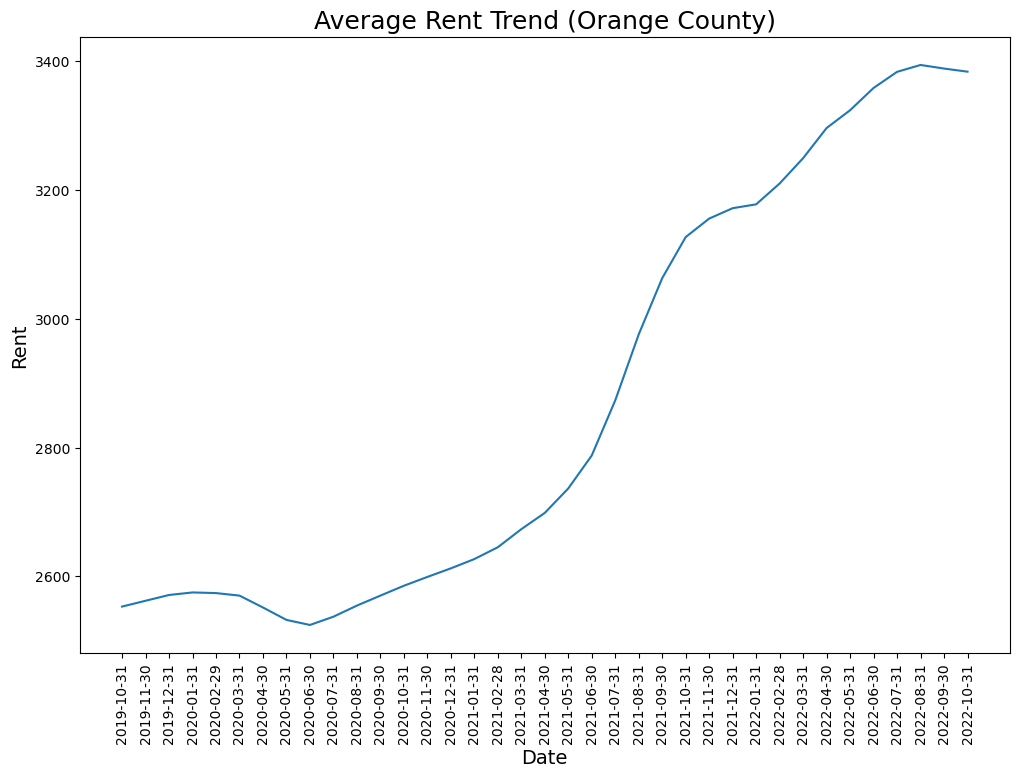

In [30]:
# Average rent three-year trend (OC only)
X_lst = list(rental.columns.values[9:-1])
X_lst

r_oc_lst = []
for i in X_lst:
    r_oc_lst.append(rental[i].mean())

# print(Y_lst)

plt.figure(figsize=(12, 8))
plt.plot(X_lst, r_oc_lst)
plt.title('Average Rent Trend (Orange County)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Rent', fontsize=14)
plt.xticks(rotation=90)
plt.show()

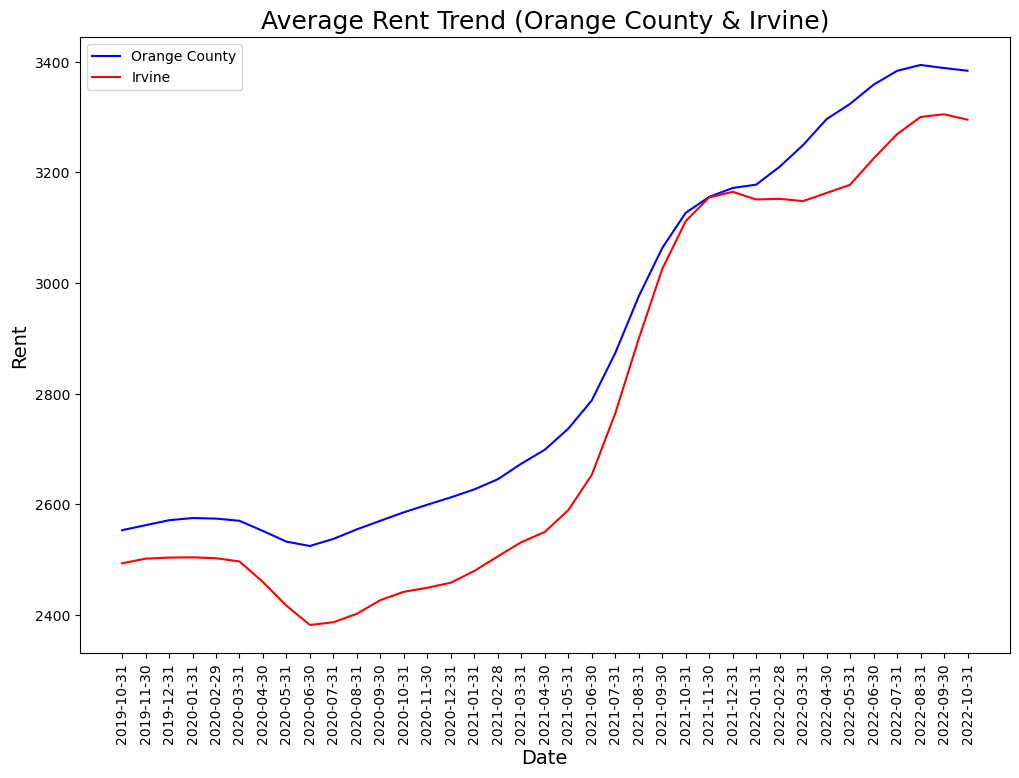

In [31]:
# Average rent three-year trend (OC + Irvine)

X_lst = list(rental.columns.values[9:-1])

r_oc_lst = []
r_oc_i_lst = []
for i in X_lst:
    r_oc_lst.append(rental[i].mean())
    r_oc_i_lst.append(rental[rental['City'] == 'Irvine'][i].mean())


plt.figure(figsize=(12, 8))
plt.plot(X_lst, r_oc_lst, color = 'blue', label="Orange County")
plt.plot(X_lst, r_oc_i_lst, color = 'red', label="Irvine")
plt.legend()
plt.title('Average Rent Trend (Orange County & Irvine)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Rent', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [32]:
dfRate = pd.read_csv("MORTGAGE30US-2.csv")#Monthly mortgage rate for last three years
dfRate.head()


,DATE,MORTGAGE30US
0,2019-10-01,3.688
1,2019-11-01,3.695
2,2019-12-01,3.720
3,2020-01-01,3.624
4,2020-02-01,3.465


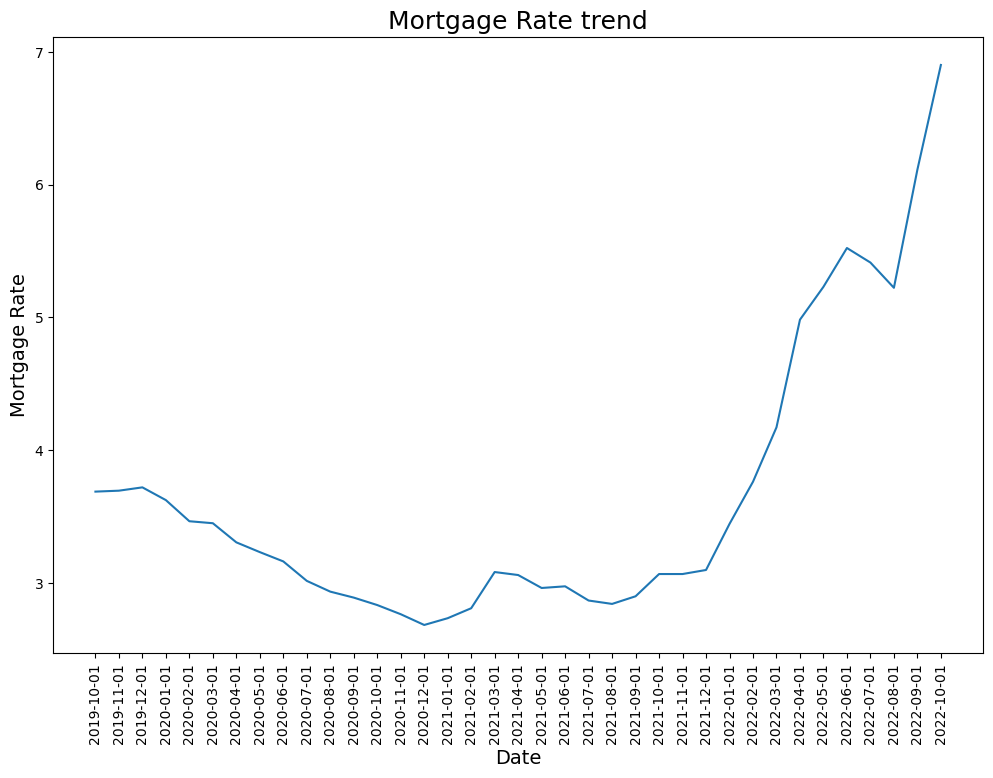

In [33]:
# Rate trend only

plt.figure(figsize=(12, 8))
plt.plot(dfRate['DATE'], dfRate['MORTGAGE30US'])
plt.title('Mortgage Rate trend', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Mortgage Rate', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [34]:
dfDate = pd.DataFrame(X_lst, columns=['Date'])
dfDate['Date'] = pd.to_datetime(dfDate['Date'])
dfDate['Date'] = pd.to_datetime(dfDate['Date']).dt.strftime('%Y-%m')
dfDate

m_oc_calculated = []
m_oc_i_calculated = []
i = 0
for r in dfRate['MORTGAGE30US']:
    m_oc_calculated.append(-1 * npf.pmt(r/100/12, 30*12, 0.8*m_oc_lst[i])) # Used the 30-year mortgage
    m_oc_i_calculated.append(-1 * npf.pmt(r/100/12, 30*12, 0.8*m_oc_i_lst[i])) # the cloest to rent price
    i += 1


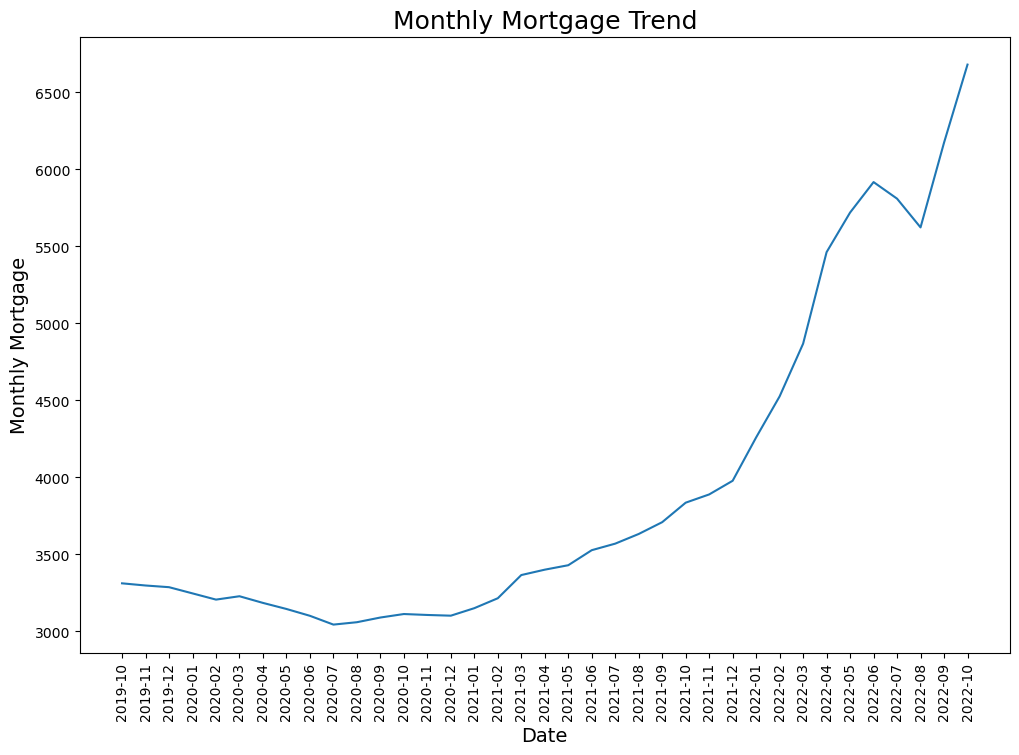

In [35]:
# Monthly mortgage trend (OC only)

plt.figure(figsize=(12, 8))
plt.plot(dfDate['Date'], m_oc_calculated)
plt.title('Monthly Mortgage Trend', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Monthly Mortgage', fontsize=14)
plt.xticks(rotation=90)
plt.show()

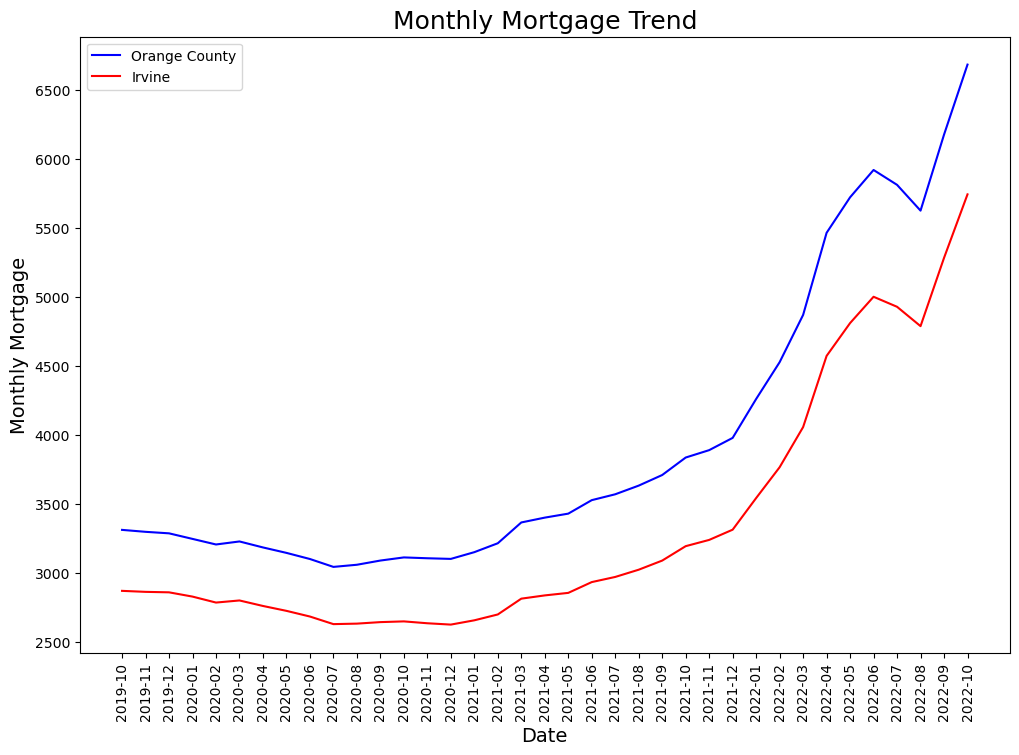

In [36]:
# Monthly mortgage trend (OC & Irvine)

plt.figure(figsize=(12, 8))
plt.plot(dfDate['Date'], m_oc_calculated, color = 'blue', label="Orange County")
plt.plot(dfDate['Date'], m_oc_i_calculated, color = 'red', label="Irvine")
plt.legend()
plt.title('Monthly Mortgage Trend', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Monthly Mortgage', fontsize=14)
plt.xticks(rotation=90)
plt.show()

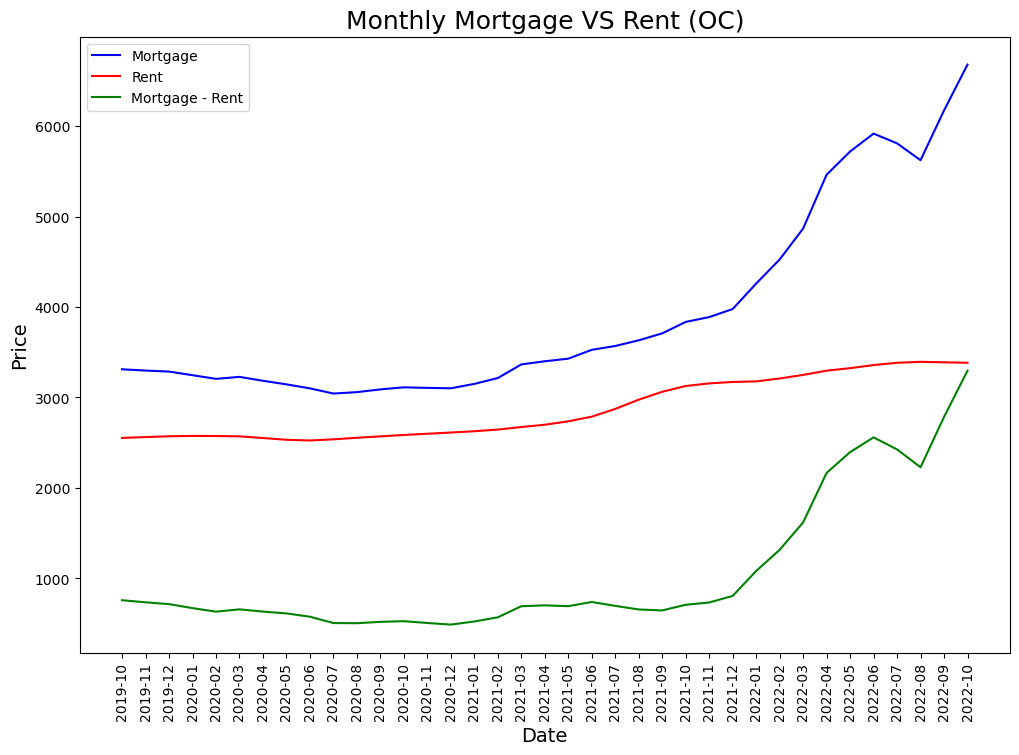

In [37]:
# Monthly Mortgage VS Rent (OC)

plt.figure(figsize=(12, 8))
plt.plot(dfDate['Date'], m_oc_calculated, color = 'blue', label="Mortgage")
plt.plot(dfDate['Date'], r_oc_lst, color = 'red', label="Rent")

array1 = np.array(m_oc_calculated)
array2 = np.array(r_oc_lst)
subtracted_price = np.subtract(array1, array2)
subtracted_price = list(subtracted_price)

plt.plot(dfDate['Date'], subtracted_price, color = 'green', label="Mortgage - Rent")

plt.legend()
plt.title('Monthly Mortgage VS Rent (OC)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=90)
plt.show()



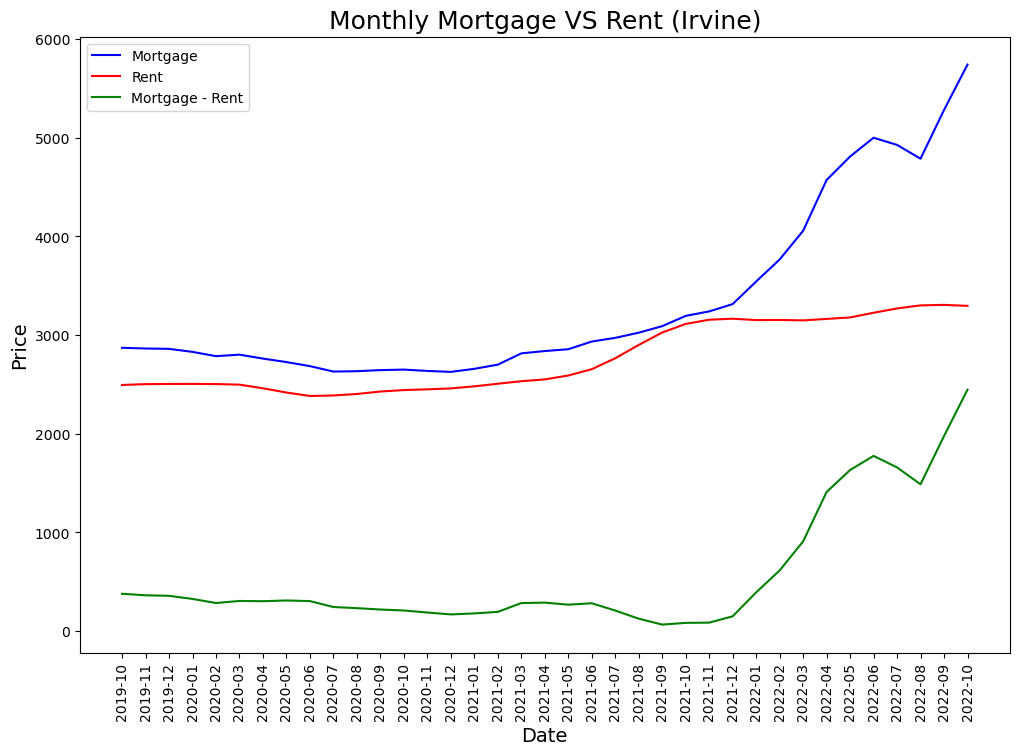

In [38]:
# Monthly Mortgage VS Rent (Irvine)

plt.figure(figsize=(12, 8))
plt.plot(dfDate['Date'], m_oc_i_calculated, color = 'blue', label="Mortgage")
plt.plot(dfDate['Date'], r_oc_i_lst, color = 'red', label="Rent")

array1 = np.array(m_oc_i_calculated)
array2 = np.array(r_oc_i_lst)
subtracted_price = np.subtract(array1, array2)
subtracted_price = list(subtracted_price)

plt.plot(dfDate['Date'], subtracted_price, color = 'green', label="Mortgage - Rent")

plt.legend()
plt.title('Monthly Mortgage VS Rent (Irvine)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=90)
plt.show()


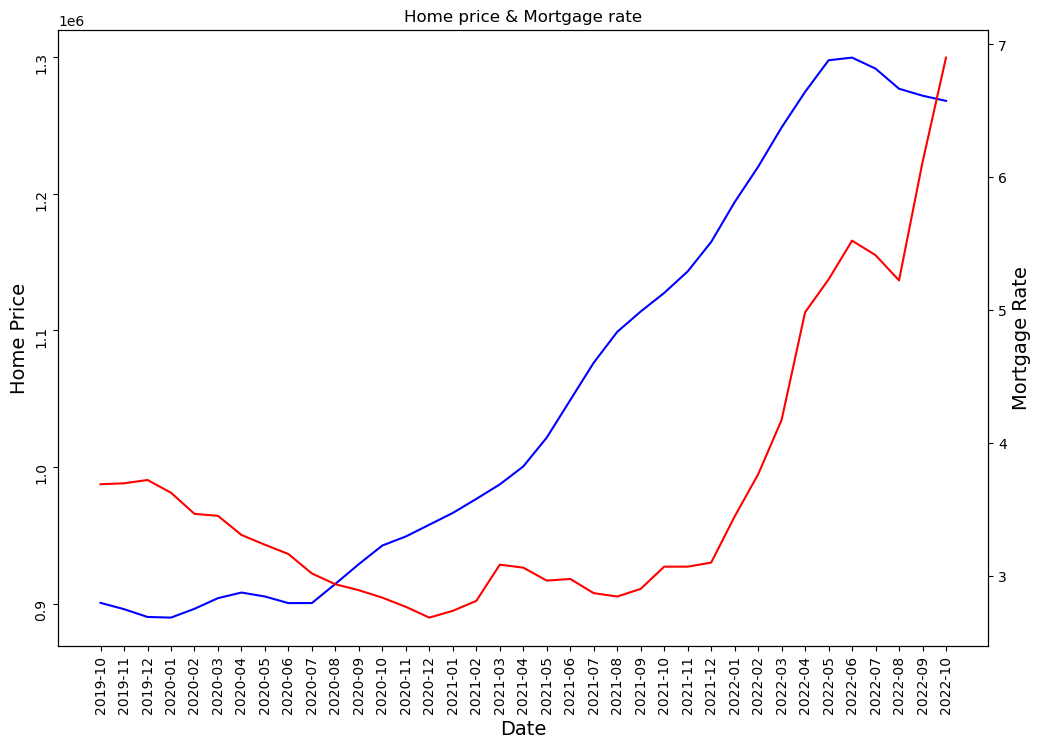

In [39]:
# Two Y-Axis Home price & Mortgage rate

fig,ax = plt.subplots(figsize=(12, 8))

ax.plot(dfDate['Date'], m_oc_lst, color = 'blue', label="Home Price")
ax.title.set_text('Home price & Mortgage rate')
ax.set_xlabel('Date', fontsize=14)
ax.tick_params(labelrotation=90)
ax.set_ylabel('Home Price', fontsize=14)

ax2=ax.twinx()
ax2.plot(dfDate['Date'], dfRate['MORTGAGE30US'], color = 'red', label="Mortgage Rate")
ax2.set_ylabel('Mortgage Rate', fontsize=14)
plt.show()

